1.	 (10 points) A food scientist is interested in the spiciness of ghost peppers grown under four different conditions. To study this, seven pepper plants were randomly assigned to a growth regiment that included partial Sunlight and Drought conditions (treatment = Drought), another seven plants were assigned to a growth regiment that included complete Sunlight and well-watered conditions    (treatment = Sunlight), and another seven plants were assigned to a growth regiment that included complete Sunlight and Drought conditions              (treatment = Sunlight/Drought). To serve as a control, a set of seven plants was assigned to normal watering conditions and Sunlight  (Control). Below are the spiciness levels of all of the 28 subjects after they completed their 1-week exercise routine. The units of measurement are millions of Scoville heat units (SHUs).


a.	(1 points) Write down the statistical model. Please provide all appropriate subscripts and degrees of freedom for each term. Briefly describe each term.

$$
y_{ij} = \mu + \tau_i + \epsilon_{ij}, i=1,2,3,4; j=1,...,7
$$

$$ 
y_{ij} = \text{spiciness of jth  replicate in ith  treatment in SHU's}, df = n_T = 28
$$

$$
\mu = \text{ grand mean}, df= 1
$$

$$
\tau_{i} = \text{ effect of the ith  treatment}, df= 3
$$

$$
\epsilon_{ij} = \text{ random residual error term for the jth replicate of the ith condition}, df= 24
$$



b.	(1 point) Run an ANOVA model using software, and test the model assumptions. If necessary, make a transformation of the data.


In [48]:
tab <- read.csv("../spicy_data.csv", header = T)

In [50]:
tab
colnames(tab)[2]<-"y"

,Treatment,SHU.x.106
1,Drought,1.54
2,Drought,1.11
3,Drought,0.96
4,Drought,1.25
5,Drought,1.54
6,Drought,1.63
7,Drought,1
8,Sunlight,1.41
9,Sunlight,1.33
10,Sunlight,1.65


In [51]:
modl<-aov(y ~ Treatment, data=tab)

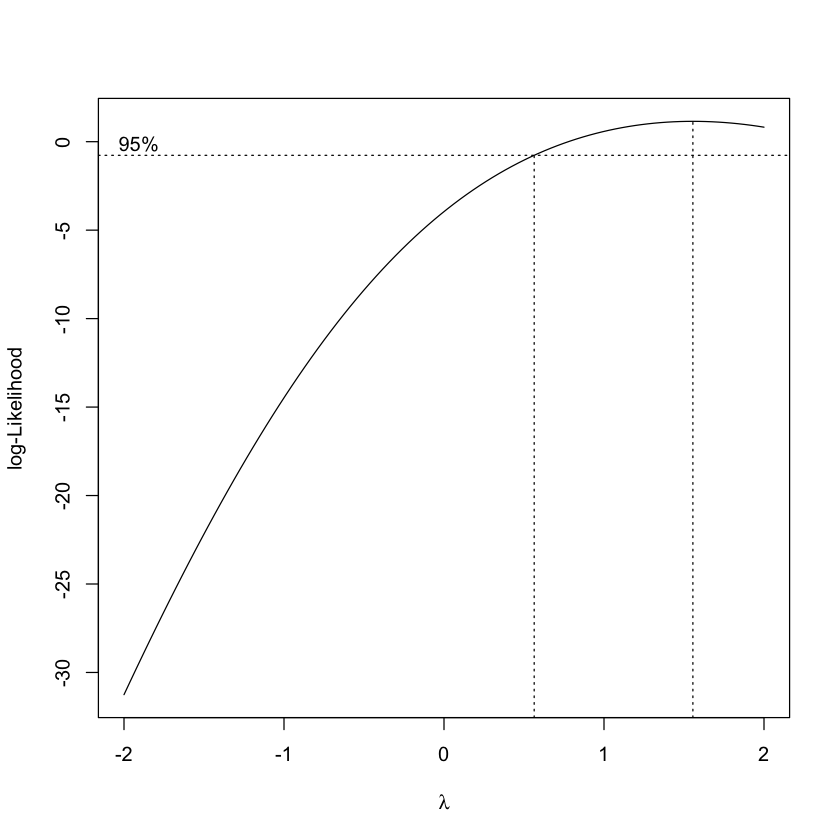

In [58]:
boxcox(modl)

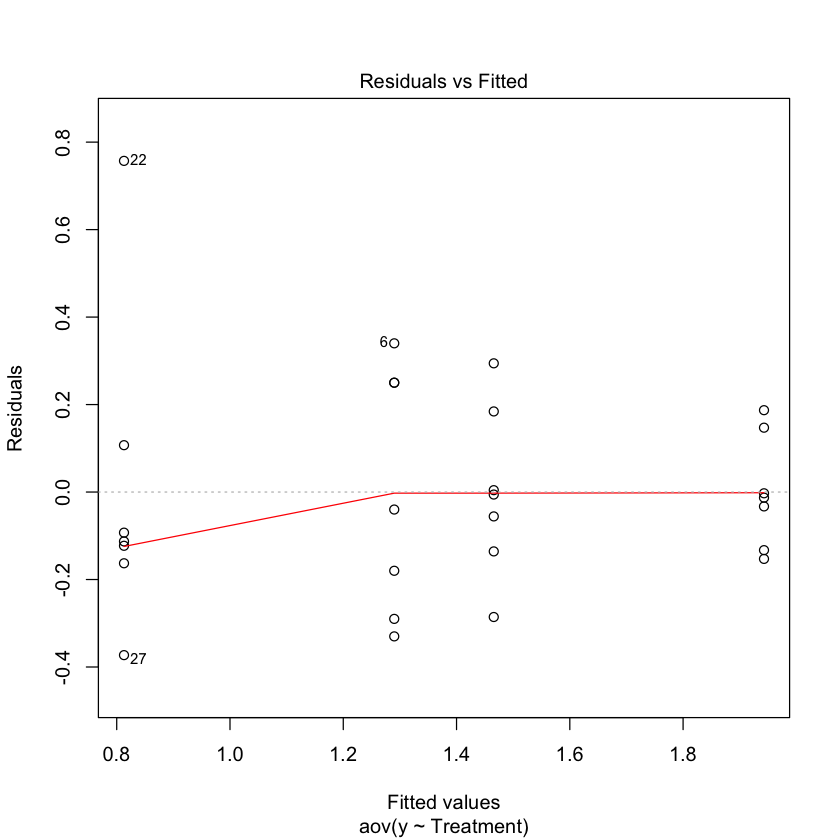

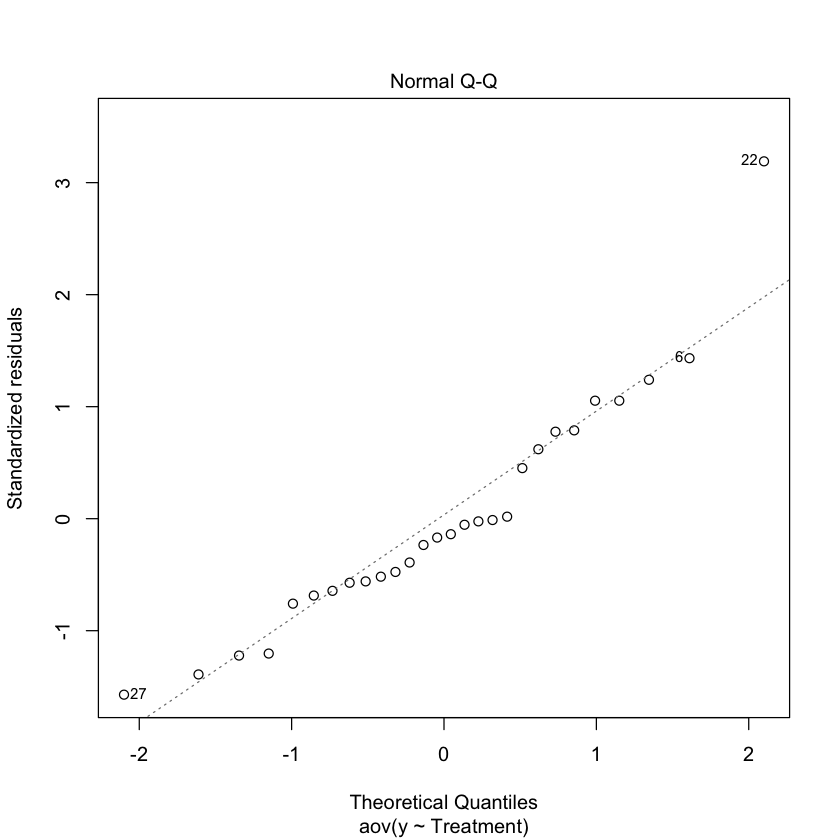

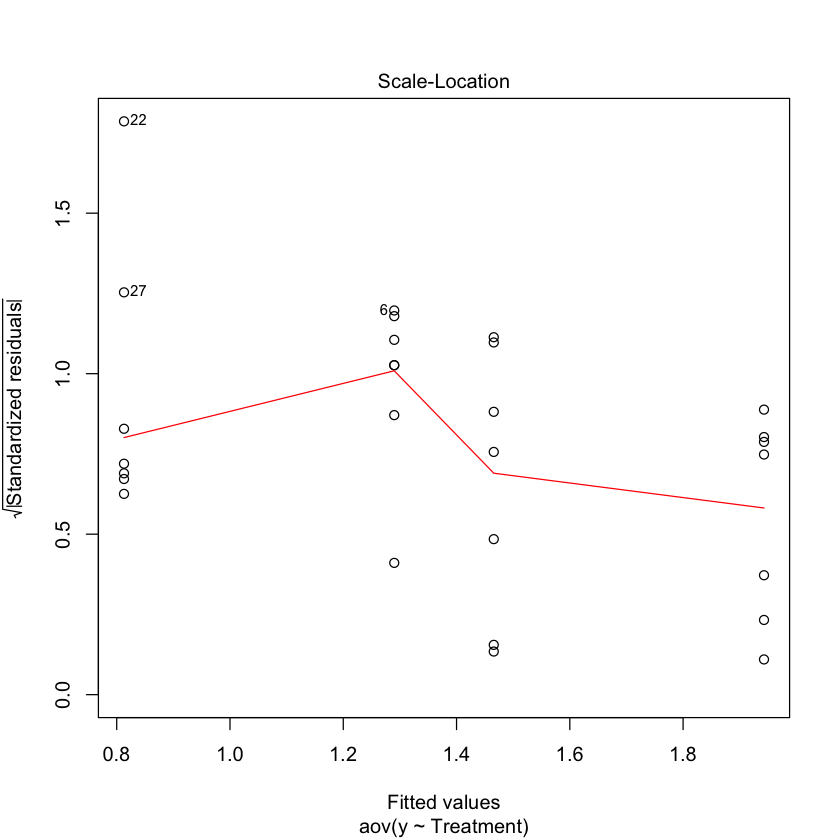

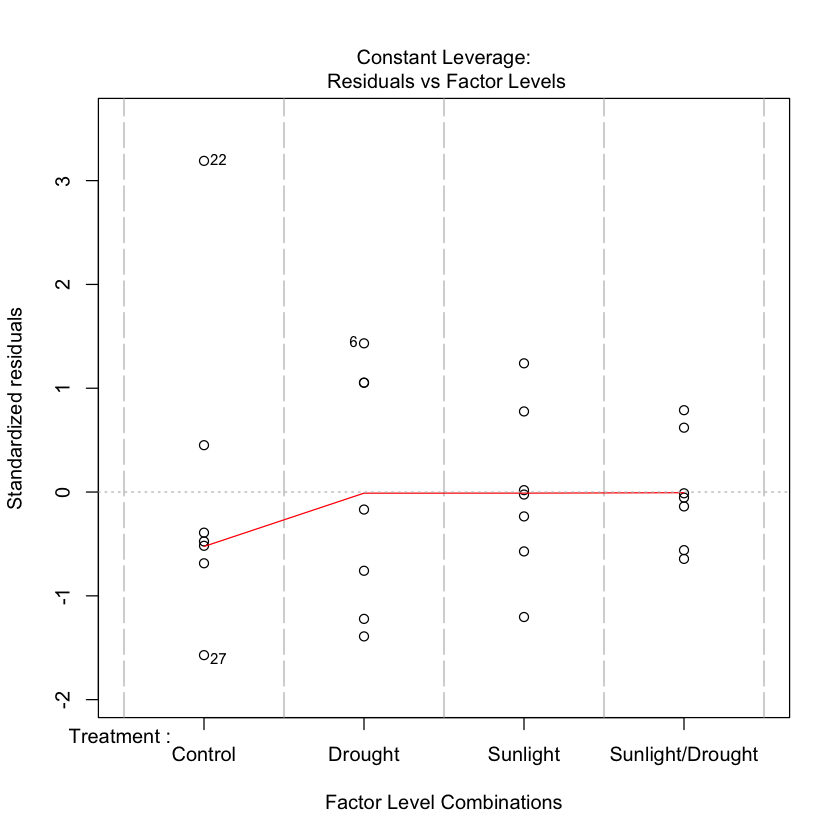

In [59]:
plot(modl)

In [65]:
shapiro.test(residuals(modl))


	Shapiro-Wilk normality test

data:  residuals(modl)
W = 0.92815, p-value = 0.05538


In [67]:
modl2 <- lm(y^(1.5) ~ Treatment, data=tab)

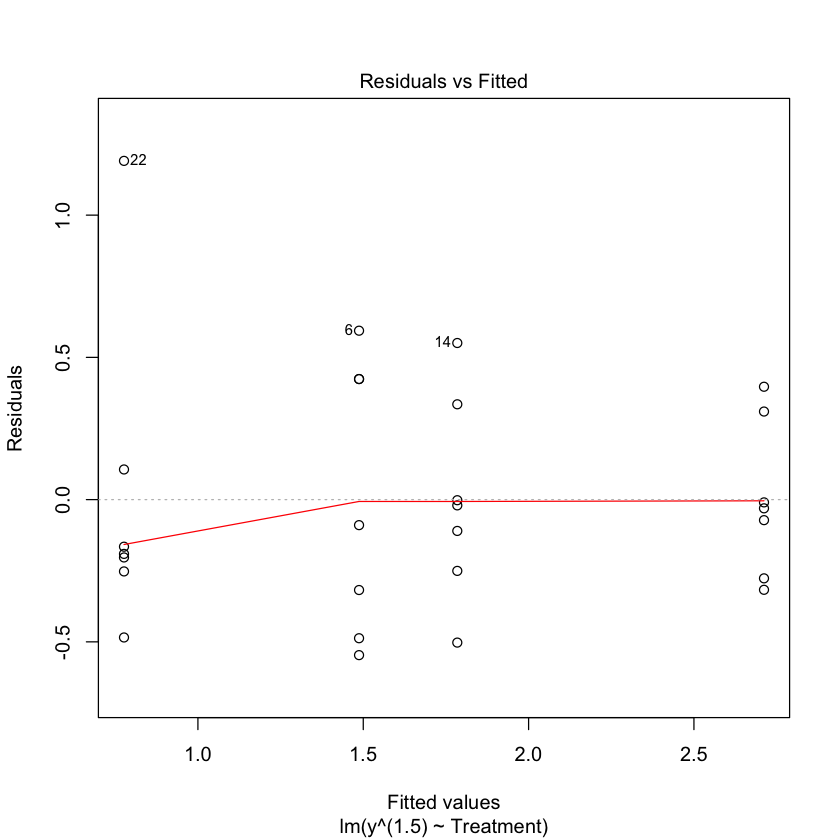

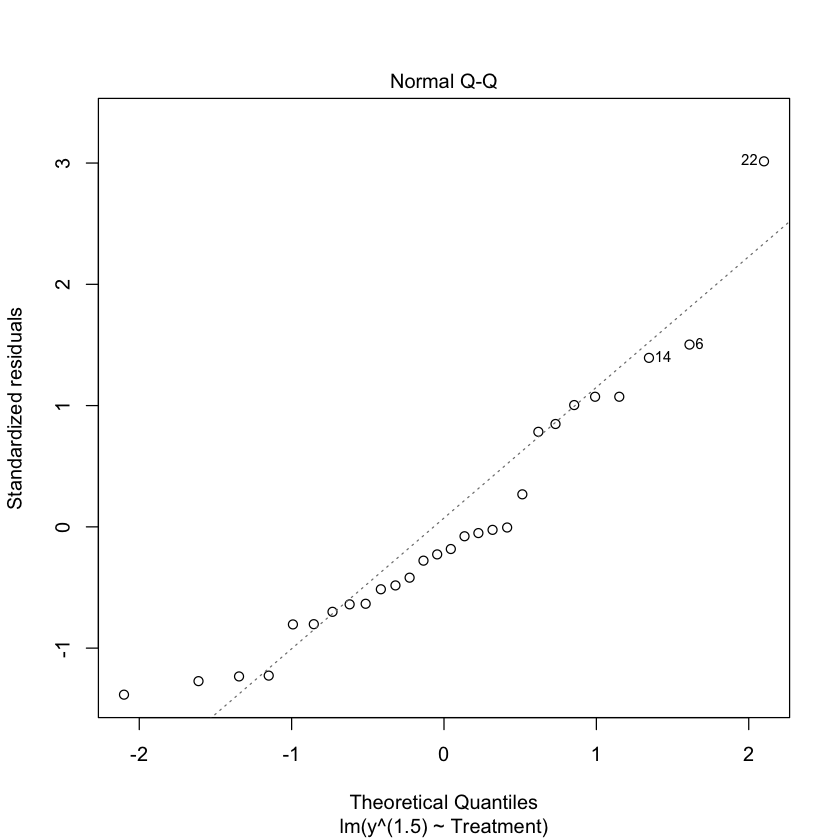

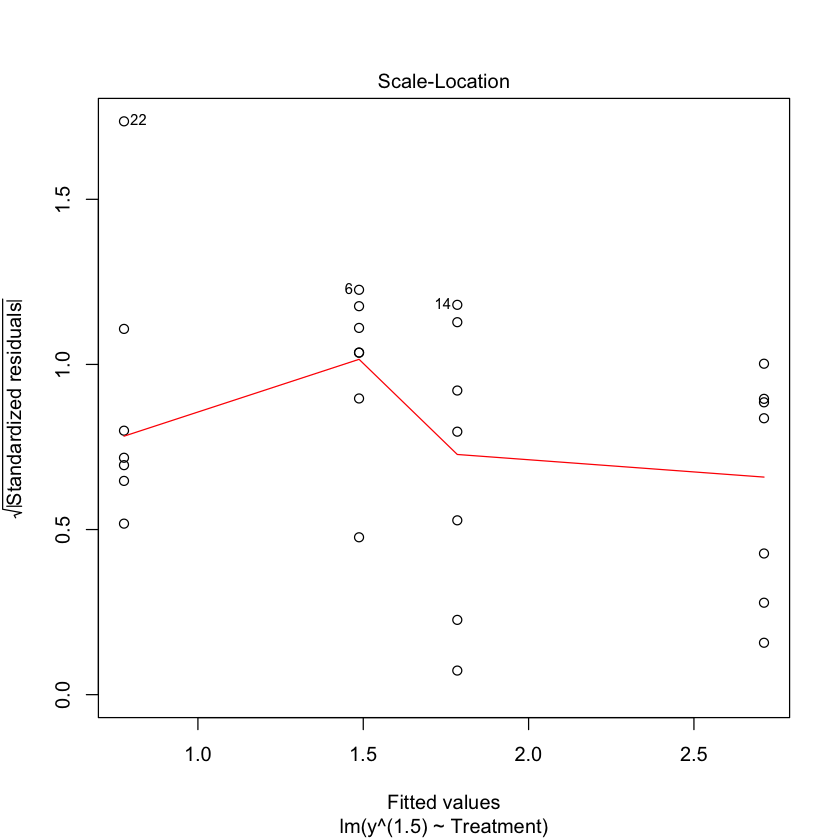

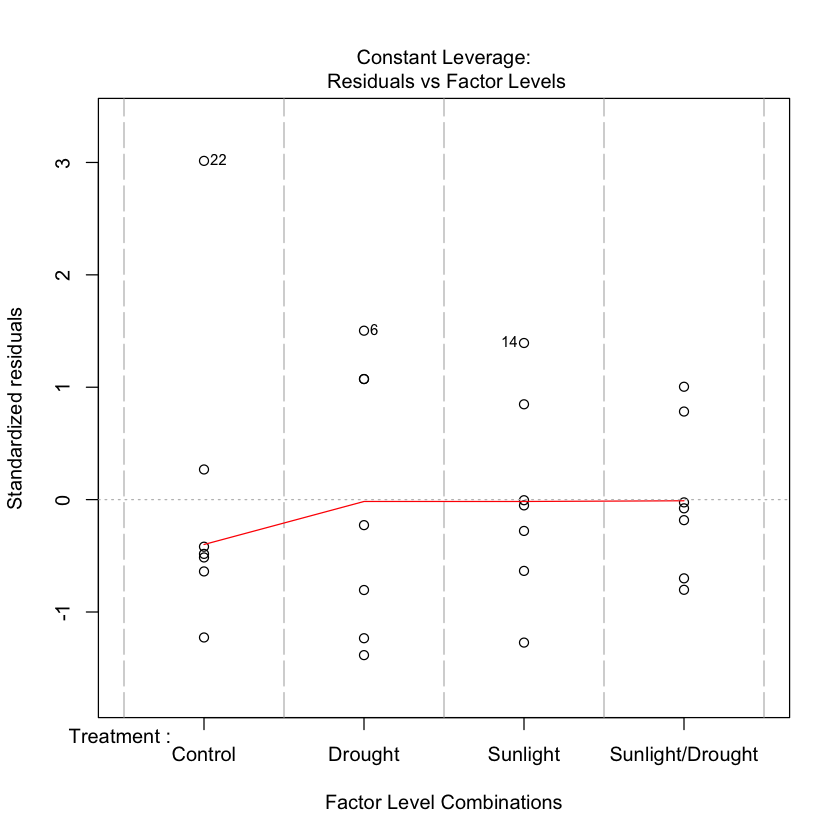

In [68]:
plot(modl2)

In [150]:
shapiro.test(residuals(modl2))$p.value

[1] 0.03605781

In [64]:
library(car)
leveneTest(y~Treatment, data=tab)

,Df,F value,Pr(>F)
group,3,0.8503437,0.4800851
,24,NA,NA


In [45]:
library(agricolae)

In [72]:
anova(modl)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Treatment,3,4.577214,1.525738,23.21902,2.822691e-07
Residuals,24,1.577057,0.06571071,NA,NA


2a.	(1 point) By hand, do a mean separation of the three treatments and control using an LSD at α = 0.05. As part of this, report the names of the treatments, treatment means, and significance letters in a table, and briefly interpret the significance letters.


In [125]:
f<-LSD.test(y=tab$y, trt = tab$Treatment,DFerror =modl$df.residual , MSerror = sum((modl$residuals)^2)/modl$df.residual)

In [126]:
f$groups

,trt,means,M
1,Sunlight/Drought,1.942857,a
2,Sunlight,1.465714,b
3,Drought,1.29,b
4,Control,0.8128571,c


2b. (1 point) Using software, do a mean separation of the three treatments and control using a Tukey’s W at $\alpha = 0.05$


In [85]:
TukeyHSD(modl)$Treatment

,diff,lwr,upr,p adj
Drought-Control,0.477142857,0.099158187,0.855127528,0.009704549
Sunlight-Control,0.6528571429,0.2748724723,1.0308418134,0.0004130338
Sunlight/Drought-Control,1.130000e+00,7.520153e-01,1.507985e+00,1.061393e-07
Sunlight-Drought,0.1757143,-0.2022704,0.5536990,0.5825218
Sunlight/Drought-Drought,0.6528571429,0.2748724723,1.0308418134,0.0004130338
Sunlight/Drought-Sunlight,0.477142857,0.099158187,0.855127528,0.009704549


2c. (1 points) Using software, do a mean separation of the three treatments and control using Scheffe’s method at $\alpha = 0.05$


In [92]:
f<-scheffe.test(modl, "Treatment")

In [94]:
f$groups

,trt,means,M
1,Sunlight/Drought,1.942857,a
2,Sunlight,1.465714,b
3,Drought,1.29,b
4,Control,0.8128571,c


2d. (1 points) Using software, do a mean separation of the three treatments and control using a two-sided Dunnett’s D at $\alpha = 0.05$

In [100]:
library(multcomp)
tab$Treatment <- relevel(tab$Treatment, ref="Control")
modl<- aov(y ~ Treatment, data=tab)
summary(glht(modl, linfct=mcp(Treatment="Dunnett")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = y ~ Treatment, data = tab)

Linear Hypotheses:
                                Estimate Std. Error t value Pr(>|t|)    
Drought - Control == 0            0.4771     0.1370   3.482  0.00525 ** 
Sunlight - Control == 0           0.6529     0.1370   4.765  < 0.001 ***
Sunlight/Drought - Control == 0   1.1300     0.1370   8.247  < 0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


2e. (0.5 point) Write out a linear combination that depicts the average value of the three treatments (i.e., excluding the control).
$$
\frac{\mu_{drought} + \mu_{sunlight} + \mu_{sunlight_drought}}{3} 
$$

In [127]:
modl1 <- lm(y ~ Treatment, data=tab)

In [117]:
l_hat <- coef(modl1)%*%c(0,1/3,1/3,1/3)

In [132]:
MSerror <- sum((residuals(modl1))^2)/modl1$df.residual 

In [133]:
MSerror

[1] 0.06571071

In [140]:
mus <- ddply(tab, .(Treatment), summarize, mu=mean(y))

l_hat <- c(0,1,1,1)/3

l <- mus$mu%*%l_hat

The formula for the estimated variance of the contrast is 
$$
\hat{V}(\hat{l}) = \frac{S^2_w}{n} \sum_{i=1}^{t}a_i^2 \approx 0.065/7( 1/9 + 1/9 + 1/9) = 0.065/21
$$

In [138]:
mus

,Treatment,mu
1,Control,0.8128571
2,Drought,1.29
3,Sunlight,1.465714
4,Sunlight/Drought,1.942857


In [144]:
v<-MSerror/21

In [145]:
MSerror/7 * l_hat%*%l_hat

0.003129082


In [147]:
t <- (l-1.59)/v
t

-7.609109


In [149]:
t_crit <- qt(.975, df=modl1$df.residual)
t_crit

[1] 2.063899

We obviously reject the null hypothesis and conclude that we have sufficient evidence to show that the linear combination is different from 1.59

2g. Write out a linear contrast to compare the spiciness of the “Control” to the “Drought” and “Sunlight” conditions.


$$
1\times\mu_{control} - \frac{\mu_{drought} + \mu_{sunlight}}{2} + 0\times \mu_{sunlight/drought}
$$



In [152]:
contr <- c(1, -1/2,-1/2, 0)

In [155]:
n <- 7
l <- mus$mu%*%contr

d <- contr%*%contr

SSC <- n*(l)^2

F <- SSC/MSerror

F_crit <- qf(.95, df1=1, df2 = modl1$df.residual)
F

34.00625


In [156]:
F_crit

[1] 4.259677

We have a linear contrast estimate 

$$
\hat{l} = 1\times\bar{y}_{control} - \frac{\bar{y}_{drought} + \bar{y}_{sunlight}}{2} + 0\times \bar{y}_{sunlight/drought} \approx 34
$$

This is much larger than the $F_{crit, \alpha=0.05, df_{c}=1, df_{error}=24} = 4.25$ and therefore we reject the null hypothesis and conclude that we have evidence to support the claim that the control is different from the average of drought and sunlight.

g.	(0.5 points) Suppose we wanted to create set of orthogonal contrasts for these data. Given that this experiment has a total of four treatment levels (i.e., three treatments and one Control), what is the maximum number of orthogonal contrasts that can be included in one set? Give one example of a set of orthogonal contrasts (that differ from the set presented in page 15 of chapter 9 lecture notes).

The maximum number of orthogonal contrasts included in one set is $t-1$ = 3.

one set is 

$$
\begin{pmatrix}
1 & -1 & 0 & 0  \\
0 & 0 & 1 & -1 \\
1 & 1 & -1 & -1 \\
\end{pmatrix}
$$